In [35]:
import pandas as pd
health = pd.read_csv("C:\Health Checkup Result.csv")
health.head(5)


C:\Users\peter\AppData\Local\Temp\ipykernel_14132\1990351365.py:2: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  health = pd.read_csv("C:\Health Checkup Result.csv")


,Unnamed: 0,YEAR,IDV_ID,SEX,AGE_GROUP,AREA_CODE,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,...,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT,DRK_YN,HCHK_CE_IN,CRS_YN,TTR_YN
0,285437,2009,297069,1,4,41,165.0,75.0,83.0,1.2,...,1.0,1.2,34.0,48.0,202.0,3.0,N,N,NaN,NaN
1,660095,2009,222353,1,7,41,175.0,70.0,88.0,1.2,...,1.0,0.8,24.0,24.0,34.0,3.0,Y,N,NaN,NaN
2,936773,2009,150310,1,11,46,160.0,55.0,77.0,0.8,...,1.0,0.8,22.0,18.0,12.0,2.0,N,Y,Y,Y
3,790463,2009,720146,2,9,26,140.0,45.0,72.0,0.8,...,1.0,0.9,21.0,15.0,20.0,1.0,N,N,NaN,NaN
4,691702,2009,535286,2,7,41,155.0,75.0,86.0,0.8,...,1.0,0.7,29.0,25.0,33.0,1.0,N,Y,NaN,Y


데이터 시각화

AGE_GROUP,AREA_CODE 별로 연령대별 수치 데이터 시각화

- male data : df1/ female data : df 대입
- male area codes = [41, 46, 28, 47, 45, 30, 43, 31, 49, 48, 27, 11, 26, 44, 29, 42, 36, 50]/ female area codes = [26, 41, 11, 45, 46, 47, 43, 42, 48, 28, 31, 30, 44, 29, 49, 27, 36, 50]
- 시각화하고자 하는  수치(SGOT_AST or SGPT_ALT or GAMMA_GTP)에 따라 대입

전체 데이터 Scatter Plot

In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('female_health_data.csv')
df1 = pd.read_csv('male_health_data.csv')

## 산점도
# area_code 리스트 정의
unique_area_codes = df['AREA_CODE'].unique()
area_codes = [26, 41, 11, 45, 46, 47, 43, 42, 48, 28, 31, 30, 44, 29, 49, 27, 36, 50]

# 그리드의 행과 열 개수 계산
num_plots = len(area_codes)
num_rows = num_plots // 3
num_cols = min(num_plots, 3)

# 그리드 생성
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# 각 area_code에 대한 산점도 그리기
for i, area_code in enumerate(area_codes):
    area_data = df[df['AREA_CODE'] == area_code]
    
    if num_plots > 1:
        row, col = divmod(i, num_cols)  # 현재 인덱스를 행과 열로 변환
        ax = axes[row, col]  # 해당 위치의 축을 선택
    else:
        ax = axes  # 하나의 subplot일 경우
    
    ax.scatter(area_data['AGE_GROUP'], area_data['SGOT_AST'], alpha=0.6, color='#98FB98')
    
    ax.set_xlabel('Age Group')
    ax.set_ylabel('SGOT_AST')
    ax.set_title(f'SGOT_AST for female(Area Code {area_code})')
    
plt.tight_layout()
plt.show()

연령별 평균 데이터 Line Plot

In [ ]:
# area_code 리스트 정의
area_codes = [26, 41, 11, 45, 46, 47, 43, 42, 48, 28, 31, 30, 44, 29, 49, 27, 36, 50]

# 그리드의 행과 열 개수 계산
num_plots = len(area_codes)
num_rows = (num_plots + 2) // 3 
num_cols = min(num_plots, 3)

# 그리드 생성 
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# 각 area_code에 대한 line plot 그리기
for i, area_code in enumerate(area_codes):
    area_data = df[df['AREA_CODE'] == area_code]

    avg_SGOT_AST = area_data.groupby('AGE_GROUP')['SGOT_AST'].mean()

    unique_AGE_GROUP = df['AGE_GROUP'].unique()
    unique_age_groups = [13, 11, 7, 9, 12, 8, 15, 6, 14, 5, 10, 16, 17, 18]
    new_AGE_GROUP = df[df['AGE_GROUP'].isin(unique_age_groups)].drop_duplicates(subset=['AGE_GROUP'])
    new_AGE_GROUP_series = new_AGE_GROUP['AGE_GROUP']

    # AGE_GROUP을 오름차순으로 정렬
    new_AGE_GROUP_series = new_AGE_GROUP_series.sort_values()

    # 정렬된 AGE_GROUP에 해당하는 avg_SGOT_AST 값 가져오기
    avg_SGOT_AST = avg_SGOT_AST.reindex(new_AGE_GROUP_series, fill_value=0)

    row, col = divmod(i, 3)  # 현재 인덱스를 행과 열로 변환
    ax = axes[row, col]  # 해당 위치의 축을 선택

    ax.plot(new_AGE_GROUP_series, avg_SGOT_AST, marker='o', linestyle='-', color='#98FB98')

    ax.set_xlabel('Age Group')
    ax.set_ylabel('avg_SGOT_AST')
    ax.set_title(f'avg_SGOT_AST for female (Area Code {area_code})')

# 남은 빈 그리드 삭제
for i in range(num_plots, num_rows*num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()  
plt.show()

연령별 최빈값 데이터 Line Plot

In [ ]:
# area_code 리스트 정의
area_codes = [26, 41, 11, 45, 46, 47, 43, 42, 48, 28, 31, 30, 44, 29, 49, 27, 36, 50]

# 그리드의 행과 열 개수 계산
num_plots = len(area_codes)
num_rows = (num_plots + 2) // 3 
num_cols = min(num_plots, 3)

# 그리드 생성
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# 각 area_code에 대한 line plot 그리기
for i, area_code in enumerate(area_codes):
    area_data = df[df['AREA_CODE'] == area_code]
    mode_SGOT_AST = area_data.groupby('AGE_GROUP')['SGOT_AST'].apply(lambda x: x.mode()[0])

    unique_age_groups = [13, 11, 7, 9, 12, 8, 15, 6, 14, 5, 10, 16, 17, 18]
    new_AGE_GROUP = df[df['AGE_GROUP'].isin(unique_age_groups)].drop_duplicates(subset=['AGE_GROUP'])
    new_AGE_GROUP_series = new_AGE_GROUP['AGE_GROUP']

    # AGE_GROUP을 오름차순으로 정렬
    new_AGE_GROUP_series = new_AGE_GROUP_series.sort_values()

    # 정렬된 AGE_GROUP에 해당하는 mode_SGOT_AST 값 가져오기
    mode_SGOT_AST = mode_SGOT_AST.reindex(new_AGE_GROUP_series, fill_value=0)

    row, col = divmod(i, 3)  # 현재 인덱스를 행과 열로 변환
    ax = axes[row, col]  # 해당 위치의 축을 선택

    ax.plot(new_AGE_GROUP_series, mode_SGOT_AST, marker='o', linestyle='-', color='#98FB98')

    ax.set_xlabel('Age Group')
    ax.set_ylabel('mode_SGOT_AST')
    ax.set_title(f'mode_SGOT_AST for female (Area Code {area_code})')

# 남은 빈 그리드 삭제
for i in range(len(area_codes), num_rows*num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

AGE_GROUP 통일시키기

In [36]:
# Adjust the AGE_GROUP values based on the condition
health.loc[health['YEAR'] < 2014, 'AGE_GROUP'] += 4
health.head(5)

,Unnamed: 0,YEAR,IDV_ID,SEX,AGE_GROUP,AREA_CODE,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,...,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT,DRK_YN,HCHK_CE_IN,CRS_YN,TTR_YN
0,285437,2009,297069,1,8,41,165.0,75.0,83.0,1.2,...,1.0,1.2,34.0,48.0,202.0,3.0,N,N,NaN,NaN
1,660095,2009,222353,1,11,41,175.0,70.0,88.0,1.2,...,1.0,0.8,24.0,24.0,34.0,3.0,Y,N,NaN,NaN
2,936773,2009,150310,1,15,46,160.0,55.0,77.0,0.8,...,1.0,0.8,22.0,18.0,12.0,2.0,N,Y,Y,Y
3,790463,2009,720146,2,13,26,140.0,45.0,72.0,0.8,...,1.0,0.9,21.0,15.0,20.0,1.0,N,N,NaN,NaN
4,691702,2009,535286,2,11,41,155.0,75.0,86.0,0.8,...,1.0,0.7,29.0,25.0,33.0,1.0,N,Y,NaN,Y


중복된 IDV_ID 제거

In [37]:
#IDV_ID가 1번 넘게 중복된 데이터의 집합 찾기
duplicates = health[health.groupby('IDV_ID')['IDV_ID'].transform('count') > 1]
print(duplicates)


        Unnamed: 0  YEAR  IDV_ID  SEX  AGE_GROUP  AREA_CODE  HEIGHT  WEIGHT  \
4           691702  2009  535286    2         11         41   155.0    75.0   
9           751965  2009  611819    2         12         41   155.0    60.0   
11          358027  2009  398187    1          9         41   175.0    95.0   
20          712272  2009  715506    2         12         26   150.0    65.0   
51          468864  2009  736771    1         10         47   165.0    85.0   
...            ...   ...     ...  ...        ...        ...     ...     ...   
119938      716368  2020  716369    1         12         41   155.0    50.0   
119944      850795  2020  850796    2         10         26   165.0    70.0   
119956      884804  2020  884805    1          9         41   175.0    75.0   
119968      181670  2020  181671    1          9         41   180.0    90.0   
119992      735068  2020  735069    1         11         41   170.0    65.0   

        WAIST  SIGHT_LEFT  ...  OLIG_PROTE_CD  CREA

In [38]:
health=health.drop_duplicates(subset=['IDV_ID'])

이상치 제거

- weight : 165 -> Nan
- waist : 999 -> Nan 
- TOT_CHOLE : 1000 이상 -> Nan
- TRIGLYCERIDE : 2000 이상 -> Nan
- HDL_CHOLE : 8000 이상 -> Nan
- LDL_CHOLE : 2000 이상 -> Nan
- HMG : 1.6 -> Nan
- CREATININE : 40 이상 -> Nan
- SGOT_AST : 700 이상 -> Nan
- SGPT_ALT : 700 이상 -> Nan
- GAMMA_GTP : 999 -> Nan

In [39]:
import numpy as np

# Apply the given conditions to the 'health' dataframe
health.loc[health['WEIGHT'] == 165, 'WEIGHT'] = np.nan
health.loc[health['WAIST'] == 999, 'WAIST'] = np.nan
health.loc[health['TOT_CHOLE'] >= 1000, 'TOT_CHOLE'] = np.nan
health.loc[health['TRIGLYCERIDE'] >= 2000, 'TRIGLYCERIDE'] = np.nan
health.loc[health['HDL_CHOLE'] >= 8000, 'HDL_CHOLE'] = np.nan
health.loc[health['LDL_CHOLE'] >= 2000, 'LDL_CHOLE'] = np.nan
health.loc[health['HMG'] == 1.6, 'HMG'] = np.nan
health.loc[health['CREATININE'] >= 40, 'CREATININE'] = np.nan
health.loc[health['SGOT_AST'] >= 700, 'SGOT_AST'] = np.nan
health.loc[health['SGPT_ALT'] >= 700, 'SGPT_ALT'] = np.nan
health.loc[health['GAMMA_GTP'] == 999, 'GAMMA_GTP'] = np.nan

'SMK_STAT', 'DRK_YN', 'HCHK_CE_IN', 'CRS_YN', 'TTR_YN' (1,0으로 통일)

In [40]:
# Check unique values and their frequencies for the specified columns
columns_to_check = ['SMK_STAT', 'DRK_YN', 'HCHK_CE_IN', 'CRS_YN', 'TTR_YN']
value_counts = {col: health[col].value_counts(dropna=False) for col in columns_to_check}

value_counts

{'SMK_STAT': SMK_STAT
 1.0    68503
 3.0    24277
 2.0    20809
 NaN       61
 Name: count, dtype: int64,
 'DRK_YN': DRK_YN
 Y      43897
 N      39073
 NaN    15861
 1      11160
 0       3659
 Name: count, dtype: int64,
 'HCHK_CE_IN': HCHK_CE_IN
 N    58277
 Y    37451
 0    11436
 1     6486
 Name: count, dtype: int64,
 'CRS_YN': CRS_YN
 NaN    88914
 N      10048
 0.0     5758
 Y       4537
 0       2377
 1.0     1365
 1        651
 Name: count, dtype: int64,
 'TTR_YN': TTR_YN
 NaN    70825
 Y      19398
 N      16941
 1       3093
 0       3047
 2        346
 Name: count, dtype: int64}

In [41]:
# 1. Filter or modify values based on the provided description

# SMK_STAT
health['SMK_STAT'] = health['SMK_STAT'].map({1.0: 1, 2.0: 2, 3.0: 3})

# DRK_YN
health['DRK_YN'] = health['DRK_YN'].replace({'Y': 1, 'N': 0}).astype(float)

# HCHK_CE_IN
health['HCHK_CE_IN'] = health['HCHK_CE_IN'].replace({'Y': 1, 'N': 0}).astype(float)

# CRS_YN
health['CRS_YN'] = health['CRS_YN'].replace({'Y': 1, 'N': 0}).astype(float)

# TTR_YN
health['TTR_YN'] = health['TTR_YN'].replace({'Y': 1, 'N': 0}).astype(float)

# 2. Display the updated unique values and their frequencies for the specified columns
updated_value_counts = {col: health[col].value_counts(dropna=False) for col in columns_to_check}

updated_value_counts


{'SMK_STAT': SMK_STAT
 1.0    68503
 3.0    24277
 2.0    20809
 NaN       61
 Name: count, dtype: int64,
 'DRK_YN': DRK_YN
 1.0    55057
 0.0    42732
 NaN    15861
 Name: count, dtype: int64,
 'HCHK_CE_IN': HCHK_CE_IN
 0.0    69713
 1.0    43937
 Name: count, dtype: int64,
 'CRS_YN': CRS_YN
 NaN    88914
 0.0    18183
 1.0     6553
 Name: count, dtype: int64,
 'TTR_YN': TTR_YN
 NaN    70825
 1.0    22491
 0.0    19988
 2.0      346
 Name: count, dtype: int64}

TTR_YN 의 2 값들 nan으로 대체

In [42]:
# Replace '2' values in 'TTR_YN' with NaN
health['TTR_YN'].replace(2, np.nan, inplace=True)

# Display the updated unique values and their frequencies for 'TTR_YN'
ttr_yn_value_counts = health['TTR_YN'].value_counts(dropna=False)
ttr_yn_value_counts


TTR_YN
NaN    71171
1.0    22491
0.0    19988
Name: count, dtype: int64

결측값 확인

In [ ]:
# Calculate the number of missing values for each column in the 'health' dataframe
missing_values = health.isnull().sum()

missing_values


결측값 처리

- HEIGHT, WEIGHT, WAIST, SIGHT_LEFT, SIGHT_RIGHT, TOT_CHOLE, TRIGLYCERIDE, HDL_CHOLE, LDL_CHOLE : 성별, 연령별 중앙값으로 채우기

- HEAR_LEFT, HEAR_RIGHT, SMK_STAT, DRK_YN, HCHK_CE_IN : 성별, 연령별 최빈값으로 채우기

- BP_HIGH, BP_LWST, BLDS, HMG, OLIG_PROTE_CD, CREATININE, SGOT_AST, SGPT_ALT, GAMMA_GTP : 성별, 연령별, 지역별 중앙값으로 채우기

In [44]:
# List of columns for each imputation strategy
median_cols_1 = ['HEIGHT', 'WEIGHT', 'WAIST', 'SIGHT_LEFT', 'SIGHT_RIGHT', 'TOT_CHOLE', 'TRIGLYCERIDE', 'HDL_CHOLE', 'LDL_CHOLE']
median_cols_2 = ['BP_HIGH', 'BP_LWST', 'BLDS', 'HMG', 'OLIG_PROTE_CD', 'CREATININE', 'SGOT_AST', 'SGPT_ALT', 'GAMMA_GTP']
mode_cols = ['HEAR_LEFT', 'HEAR_RIGHT', 'SMK_STAT', 'DRK_YN', 'HCHK_CE_IN']

# Impute missing values using median based on SEX and AGE_GROUP for the first group of columns
for col in median_cols_1:
    health[col] = health.groupby(['SEX', 'AGE_GROUP'])[col].transform(lambda x: x.fillna(x.median()))

# Impute missing values using median based on SEX, AGE_GROUP, and AREA_CODE for the second group of columns
for col in median_cols_2:
    health[col] = health.groupby(['SEX', 'AGE_GROUP', 'AREA_CODE'])[col].transform(lambda x: x.fillna(x.median()))

# Impute missing values using mode based on SEX and AGE_GROUP for the third group of columns
for col in mode_cols:
    health[col] = health.groupby(['SEX', 'AGE_GROUP'])[col].transform(lambda x: x.fillna(x.mode().iloc[0]))

# Check the number of missing values again after imputation
missing_values_after = health[median_cols_1 + median_cols_2 + mode_cols].isnull().sum()

missing_values_after


HEIGHT           0
WEIGHT           0
WAIST            0
SIGHT_LEFT       0
SIGHT_RIGHT      0
TOT_CHOLE        0
TRIGLYCERIDE     0
HDL_CHOLE        0
LDL_CHOLE        0
BP_HIGH          0
BP_LWST          0
BLDS             0
HMG              0
OLIG_PROTE_CD    0
CREATININE       0
SGOT_AST         0
SGPT_ALT         0
GAMMA_GTP        0
HEAR_LEFT        0
HEAR_RIGHT       0
SMK_STAT         0
DRK_YN           0
HCHK_CE_IN       0
dtype: int64

CRS_YN,TTR_YN 결측값의 비율이 너무 높기에 변수 자체 제거

In [45]:
# Drop the columns 'CRS_YN' and 'TTR_YN' from the 'health' dataframe
health = health.drop(columns=['CRS_YN', 'TTR_YN'])

# Verify that the columns have been removed
remaining_cols = health.columns

remaining_cols


Index(['Unnamed: 0', 'YEAR', 'IDV_ID', 'SEX', 'AGE_GROUP', 'AREA_CODE',
       'HEIGHT', 'WEIGHT', 'WAIST', 'SIGHT_LEFT', 'SIGHT_RIGHT', 'HEAR_LEFT',
       'HEAR_RIGHT', 'BP_HIGH', 'BP_LWST', 'BLDS', 'TOT_CHOLE', 'TRIGLYCERIDE',
       'HDL_CHOLE', 'LDL_CHOLE', 'HMG', 'OLIG_PROTE_CD', 'CREATININE',
       'SGOT_AST', 'SGPT_ALT', 'GAMMA_GTP', 'SMK_STAT', 'DRK_YN',
       'HCHK_CE_IN'],
      dtype='object')

IDV_ID는 개별 관측치를 식별하기 위한 시리얼 번호이고, Unnamed: 0는 데이터프레임의 인덱스를 나타내기 때문에 두 변수 제거.

In [46]:
# Drop the columns 'IDV_ID' and 'Unnamed: 0' from the 'health' dataframe
health = health.drop(columns=['IDV_ID', 'Unnamed: 0'])

# Verify that the columns have been removed
remaining_cols_after_drop = health.columns

remaining_cols_after_drop

Index(['YEAR', 'SEX', 'AGE_GROUP', 'AREA_CODE', 'HEIGHT', 'WEIGHT', 'WAIST',
       'SIGHT_LEFT', 'SIGHT_RIGHT', 'HEAR_LEFT', 'HEAR_RIGHT', 'BP_HIGH',
       'BP_LWST', 'BLDS', 'TOT_CHOLE', 'TRIGLYCERIDE', 'HDL_CHOLE',
       'LDL_CHOLE', 'HMG', 'OLIG_PROTE_CD', 'CREATININE', 'SGOT_AST',
       'SGPT_ALT', 'GAMMA_GTP', 'SMK_STAT', 'DRK_YN', 'HCHK_CE_IN'],
      dtype='object')

In [47]:
# Calculate the number of missing values for each column in the 'health' dataframe
remaining_missing_values = health.isnull().sum()

# Filter out columns with no missing values
remaining_missing_values = remaining_missing_values[remaining_missing_values > 0]

remaining_missing_values


Series([], dtype: int64)

지역과 나이 그룹핑

AREA_CODE 지역별로 나눔 
- Metropolitan (대도시 그룹): 주요 대도시 지역 서울, 부산, 대구, 인천, 광주, 대전, 울산
- Gyeonggi & Gangwon (경기 & 강원 그룹): 경기도 및 강원도
- Chungcheong & Sejong (충청 & 세종 그룹): 충청남도, 충청북도 및 세종
- Jeolla (전라 그룹): 전라남도, 전라북도 및 제주도(제주도 데이터 적어서)
- Gyeongsang (경상 그룹): 경상남도, 경상북도

In [48]:
# Define the area_code_grouping dictionary
area_code_grouping = {
    11: 'Metropolitan', 26: 'Metropolitan', 27: 'Metropolitan', 28: 'Metropolitan',
    29: 'Metropolitan', 30: 'Metropolitan', 31: 'Metropolitan',
    41: 'Gyeonggi & Gangwon', 42: 'Gyeonggi & Gangwon',
    36: 'Chungcheong & Sejong', 43: 'Chungcheong & Sejong', 44: 'Chungcheong & Sejong',
    45: 'Jeolla', 46: 'Jeolla', 49: 'Jeolla',
    47: 'Gyeongsang', 48: 'Gyeongsang'
}

# Apply the area_code_grouping to the 'health' dataframe
health['AREA_GROUP'] = health['AREA_CODE'].map(area_code_grouping)

# Verify the changes
health[['AREA_CODE', 'AREA_GROUP']].head()


,AREA_CODE,AREA_GROUP
0,41,Gyeonggi & Gangwon
1,41,Gyeonggi & Gangwon
2,46,Jeolla
3,26,Metropolitan
4,41,Gyeonggi & Gangwon


AGE_GROUP 그룹핑 진행 5개의 그룹
- AGE_GROUP에 따른 GAMMA_GTTP의 분포 확인

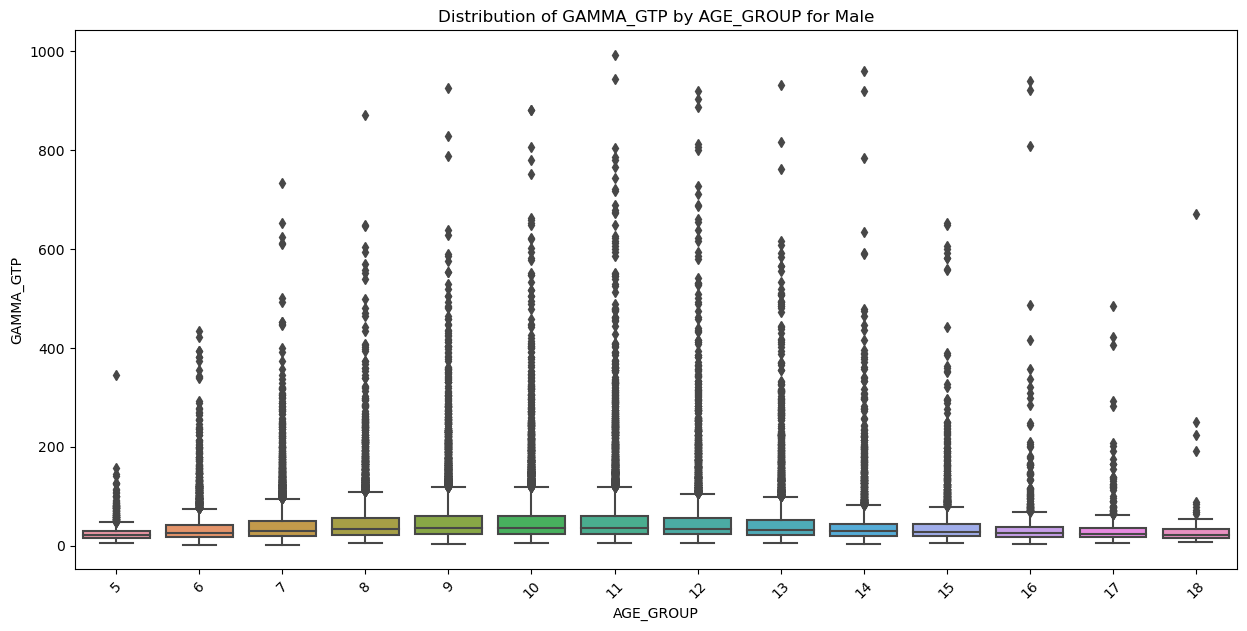

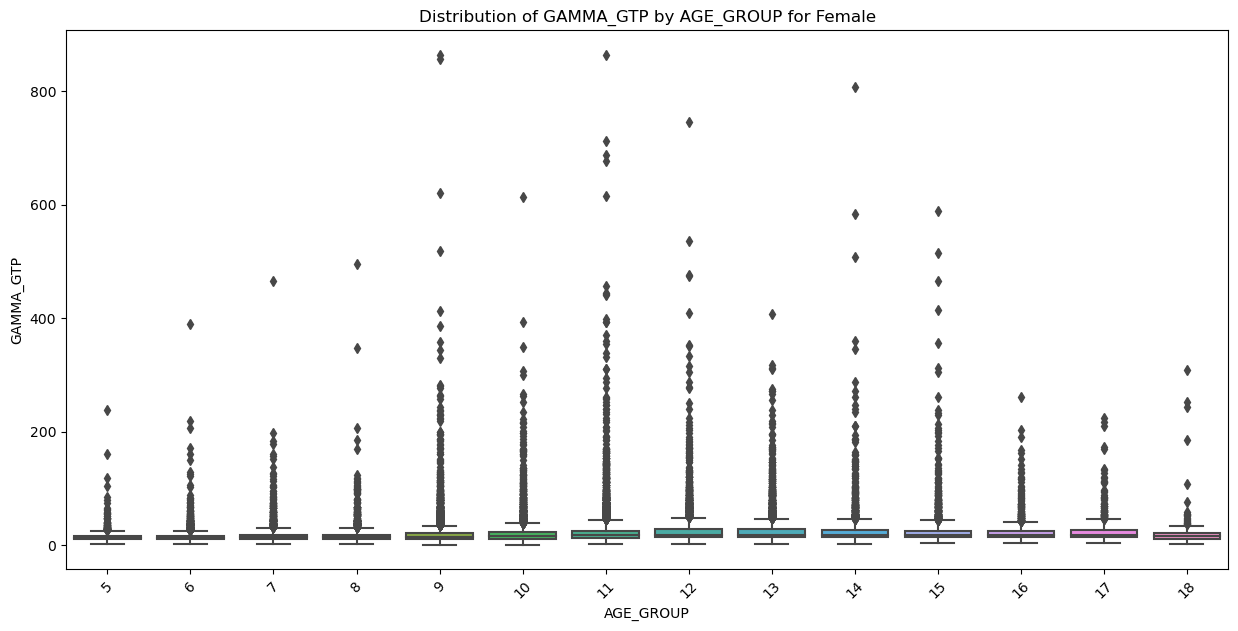

In [49]:
# Create separate plots for male and female GAMMA_GTP distribution by AGE_GROUP
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Plot for Male
plt.figure(figsize=(15, 7))
sns.boxplot(x='AGE_GROUP', y='GAMMA_GTP', data=health[health['SEX'] == 1])
plt.title('Distribution of GAMMA_GTP by AGE_GROUP for Male')
plt.xlabel('AGE_GROUP')
plt.ylabel('GAMMA_GTP')
plt.xticks(rotation=45)
plt.show()

# Plot for Female
plt.figure(figsize=(15, 7))
sns.boxplot(x='AGE_GROUP', y='GAMMA_GTP', data=health[health['SEX'] == 2])
plt.title('Distribution of GAMMA_GTP by AGE_GROUP for Female')
plt.xlabel('AGE_GROUP')
plt.ylabel('GAMMA_GTP')
plt.xticks(rotation=45)
plt.show()


남성 (SEX=1):

20대 초반부터 60대 초반까지 GAMMA_GTP 값이 상승하는 경향을 보임
60대 중반부터는 GAMMA_GTP 값이 감소하는 경향을 보임
여성 (SEX=2):

20대 중반부터 60대 중반까지 GAMMA_GTP 값이 상승하는 경향을 보임
70대부터는 GAMMA_GTP 값이 감소하는 경향을 보임

남성:

- 청년기: 20대 중반까지 : "YOUNG"
- 중년 전기: 20대 후반부터 40대 중반까지 : "Middle Age Early"
- 중년 후기: 40대 후반부터 50대 중반까지 : "Middle Age Late"
- 노년 전기: 50대 후반부터 60대 중반까지 :"Elderly Early"
- 노년 후기: 60대 후반 이후 : "Elderly Late"

여성:
- 청년기: 20대까지 "Young"
- 중년 전기: 30대와 40대 초반 : "Middle Age Early"
- 중년 후기: 40대 중반부터 50대까지 : "Middle Age Late"
- 노년 전기: 60대까지 : "Elderly Early"
- 노년 후기: 70대 이후 : "Elderly Late"

In [53]:
# Define the age groupings based on the given criteria
male_age_grouping = {
    range(20, 27): "Young",
    range(27, 46): "Middle Age Early",
    range(46, 56): "Middle Age Late",
    range(56, 67): "Elderly Early",
    range(67, 100): "Elderly Late"
}

female_age_grouping = {
    range(20, 31): "Young",
    range(31, 45): "Middle Age Early",
    range(45, 51): "Middle Age Late",
    range(51, 61): "Elderly Early",
    range(61, 100): "Elderly Late"
}

# Convert AGE_GROUP to actual age using the middle value for each group
age_group_to_actual_age = {
    5: 22,   # 20~24 -> 22
    6: 27,   # 25~29 -> 27
    7: 32,   # 30~34 -> 32
    8: 37,   # 35~39 -> 37
    9: 42,   # 40~44 -> 42
    10: 47,  # 45~49 -> 47
    11: 52,  # 50~54 -> 52
    12: 57,  # 55~59 -> 57
    13: 62,  # 60~64 -> 62
    14: 67,  # 65~69 -> 67
    15: 72,  # 70~74 -> 72
    16: 77,  # 75~79 -> 77
    17: 82,  # 80~84 -> 82
    18: 87   # 85+ -> 87
}

# Convert AGE_GROUP to actual age
health['ACTUAL_AGE'] = health['AGE_GROUP'].map(age_group_to_actual_age)

# Apply the age groupings based on actual age and gender
health.loc[health['SEX'] == 1, 'AGE_GROUP_NEW'] = health[health['SEX'] == 1]['ACTUAL_AGE'].apply(lambda x: next((v for k, v in male_age_grouping.items() if x in k), None))
health.loc[health['SEX'] == 2, 'AGE_GROUP_NEW'] = health[health['SEX'] == 2]['ACTUAL_AGE'].apply(lambda x: next((v for k, v in female_age_grouping.items() if x in k), None))

health[['SEX', 'AGE_GROUP', 'ACTUAL_AGE', 'AGE_GROUP_NEW']].head(10)


,SEX,AGE_GROUP,ACTUAL_AGE,AGE_GROUP_NEW
0,1,8,37,Middle Age Early
1,1,11,52,Middle Age Late
2,1,15,72,Elderly Late
3,2,13,62,Elderly Late
4,2,11,52,Elderly Early
5,1,11,52,Middle Age Late
6,2,7,32,Middle Age Early
7,2,9,42,Middle Age Early
8,1,6,27,Middle Age Early
9,2,12,57,Elderly Early


In [54]:
# Check the distribution of the new age groups based on gender
male_age_group_new_distribution = health[health['SEX'] == 1]['AGE_GROUP_NEW'].value_counts(dropna=False).sort_index()
female_age_group_new_distribution = health[health['SEX'] == 2]['AGE_GROUP_NEW'].value_counts(dropna=False).sort_index()

male_age_group_new_distribution, female_age_group_new_distribution


(AGE_GROUP_NEW
 Elderly Early       11469
 Elderly Late         7781
 Middle Age Early    25501
 Middle Age Late     15293
 Young                1062
 Name: count, dtype: int64,
 AGE_GROUP_NEW
 Elderly Early       13543
 Elderly Late        14765
 Middle Age Early    13109
 Middle Age Late      6204
 Young                4923
 Name: count, dtype: int64)

새로만든 변수만 남기고 AGE_GROUP,AREA_CODE는 제거

In [55]:
# Drop the original and intermediate columns used for grouping
columns_to_drop = ['AGE_GROUP', 'AREA_CODE', 'ACTUAL_AGE']
health = health.drop(columns=columns_to_drop)

# Check the updated columns in the health dataframe
health.columns


Index(['YEAR', 'SEX', 'HEIGHT', 'WEIGHT', 'WAIST', 'SIGHT_LEFT', 'SIGHT_RIGHT',
       'HEAR_LEFT', 'HEAR_RIGHT', 'BP_HIGH', 'BP_LWST', 'BLDS', 'TOT_CHOLE',
       'TRIGLYCERIDE', 'HDL_CHOLE', 'LDL_CHOLE', 'HMG', 'OLIG_PROTE_CD',
       'CREATININE', 'SGOT_AST', 'SGPT_ALT', 'GAMMA_GTP', 'SMK_STAT', 'DRK_YN',
       'HCHK_CE_IN', 'AREA_GROUP', 'AGE_GROUP_NEW'],
      dtype='object')

원-핫 인코딩 적용
- 'SMK_STAT', 'DRK_YN', 'HCHK_CE_IN', 'AREA_GROUP', 'AGE_GROUP_NEW'

In [56]:
# Apply one-hot encoding to the specified columns
health_encoded = pd.get_dummies(health, columns=['SMK_STAT', 'DRK_YN', 'HCHK_CE_IN', 'AREA_GROUP', 'AGE_GROUP_NEW'])

# Check the columns after one-hot encoding
health_encoded.columns


Index(['YEAR', 'SEX', 'HEIGHT', 'WEIGHT', 'WAIST', 'SIGHT_LEFT', 'SIGHT_RIGHT',
       'HEAR_LEFT', 'HEAR_RIGHT', 'BP_HIGH', 'BP_LWST', 'BLDS', 'TOT_CHOLE',
       'TRIGLYCERIDE', 'HDL_CHOLE', 'LDL_CHOLE', 'HMG', 'OLIG_PROTE_CD',
       'CREATININE', 'SGOT_AST', 'SGPT_ALT', 'GAMMA_GTP', 'SMK_STAT_1.0',
       'SMK_STAT_2.0', 'SMK_STAT_3.0', 'DRK_YN_0.0', 'DRK_YN_1.0',
       'HCHK_CE_IN_0.0', 'HCHK_CE_IN_1.0', 'AREA_GROUP_Chungcheong & Sejong',
       'AREA_GROUP_Gyeonggi & Gangwon', 'AREA_GROUP_Gyeongsang',
       'AREA_GROUP_Jeolla', 'AREA_GROUP_Metropolitan',
       'AGE_GROUP_NEW_Elderly Early', 'AGE_GROUP_NEW_Elderly Late',
       'AGE_GROUP_NEW_Middle Age Early', 'AGE_GROUP_NEW_Middle Age Late',
       'AGE_GROUP_NEW_Young'],
      dtype='object')

GAMMA_GTP 와의 상관관계 분석

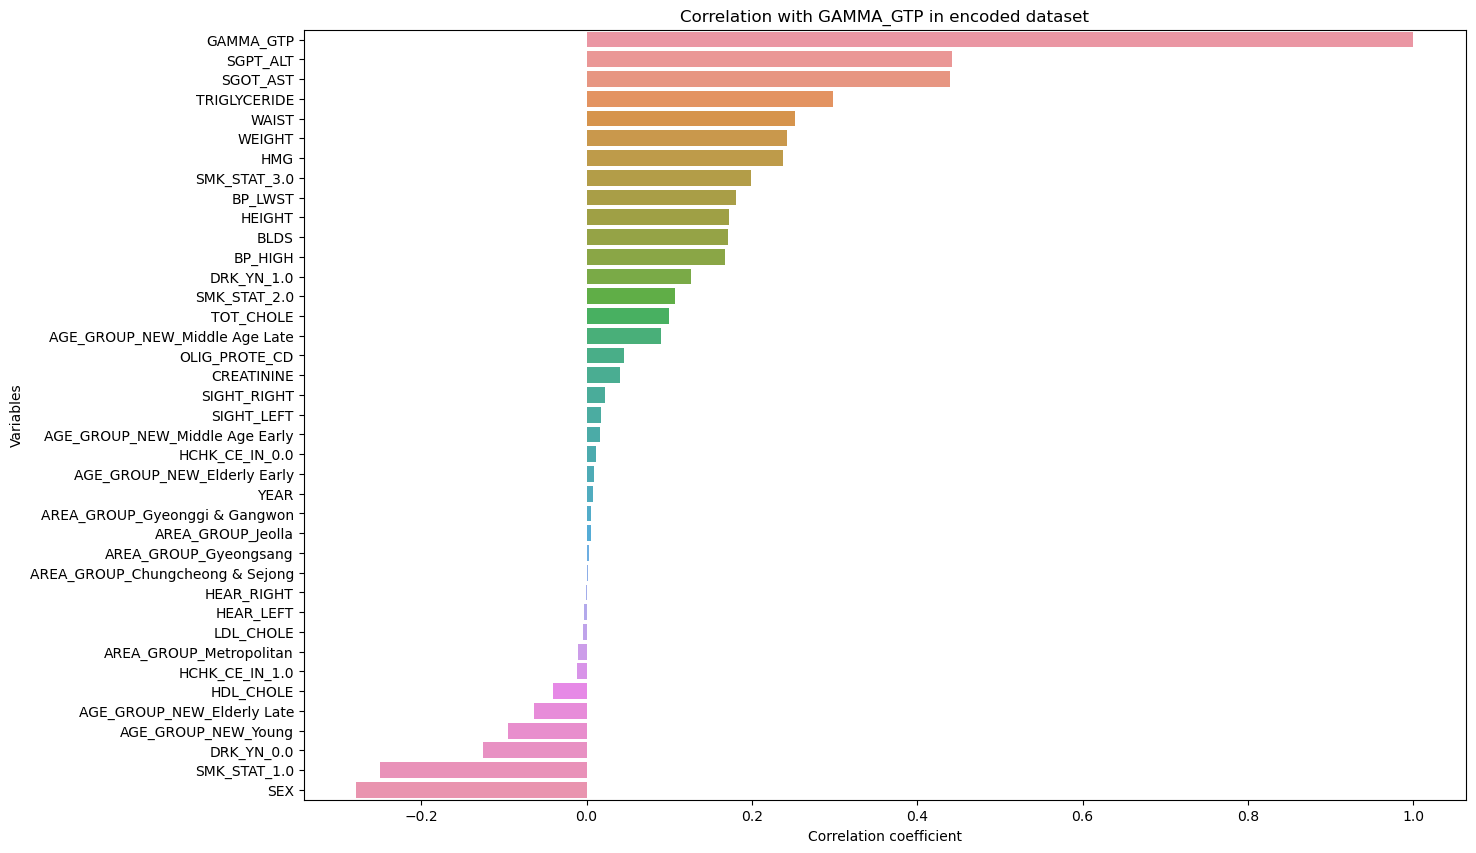

In [58]:
gamma_gtp_corr = health_encoded.corr()['GAMMA_GTP'].sort_values(ascending=False)


plt.figure(figsize=(15, 10))
sns.barplot(x=gamma_gtp_corr.values, y=gamma_gtp_corr.index)
plt.title('Correlation with GAMMA_GTP in encoded dataset')
plt.xlabel('Correlation coefficient')
plt.ylabel('Variables')
plt.show()

랜덤 포레스트 모델 GAMMA_GTP 예측 모델

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and test sets
X = health_encoded.drop(columns='GAMMA_GTP')
y = health_encoded['GAMMA_GTP']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
results = {
    "Random Forest": (mean_squared_error(y_test, rf_pred, squared=False), r2_score(y_test, rf_pred)),
}


In [61]:
results

{'Random Forest': (37.11238884846104, 0.37536984405085405)}

선형 회귀 GAAMMA_GTP 예측 모델

In [74]:
from sklearn.linear_model import LinearRegression

# Split the data into training and test sets
X = health_encoded_reduced.drop(columns='GAMMA_GTP')
y = health_encoded_reduced['GAMMA_GTP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
results = {
    "Linear Regression": (mean_squared_error(y_test, lr_pred, squared=False), r2_score(y_test, lr_pred))
}
results

{'Linear Regression': (39.14287644843257, 0.3051507365001027)}

선형 회귀 GAAMMA_GTP 예측 모델 
- 남,여 데이터 분리 

In [71]:
# Splitting the data based on gender
male_data = health_encoded[health_encoded['SEX'] == 1]
female_data = health_encoded[health_encoded['SEX'] == 2]

# Dropping the 'SEX' column as it's redundant now
male_data = male_data.drop(columns=['SEX'])
female_data = female_data.drop(columns=['SEX'])

# Splitting male data into train and test
X_male = male_data.drop(columns='GAMMA_GTP')
y_male = male_data['GAMMA_GTP']
X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(X_male, y_male, test_size=0.2, random_state=42)

# Splitting female data into train and test
X_female = female_data.drop(columns='GAMMA_GTP')
y_female = female_data['GAMMA_GTP']
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(X_female, y_female, test_size=0.2, random_state=42)

# Train and evaluate Random Forest and Linear Regression for male data

lr_model_male = LinearRegression()


lr_model_male.fit(X_train_male, y_train_male)


lr_pred_male = lr_model_male.predict(X_test_male)

results_male = {
   
    "Linear Regression": (mean_squared_error(y_test_male, lr_pred_male, squared=False), r2_score(y_test_male, lr_pred_male))
}

# Train and evaluate Random Forest and Linear Regression for female data

lr_model_female = LinearRegression()


lr_model_female.fit(X_train_female, y_train_female)


lr_pred_female = lr_model_female.predict(X_test_female)

results_female = {
    
    "Linear Regression": (mean_squared_error(y_test_female, lr_pred_female, squared=False), r2_score(y_test_female, lr_pred_female))
}

results_male, results_female


({'Linear Regression': (48.58849701846376, 0.27989533544324063)},
 {'Linear Regression': (20.699131920265, 0.27666337007565367)})

상관관계가 낮은 피처 10개 제거

In [68]:
# Calculating the correlation with GAMMA_GTP
gamma_gtp_corr = health_encoded.corr()['GAMMA_GTP'].sort_values(ascending=False)

# Extracting the 10 features with the lowest absolute correlation to GAMMA_GTP
low_corr_features = gamma_gtp_corr.abs().nsmallest(10).index

# Dropping these features from the dataset
health_encoded_reduced = health_encoded.drop(columns=low_corr_features)
health_encoded_reduced.head()


,SEX,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,...,SMK_STAT_2.0,SMK_STAT_3.0,DRK_YN_0.0,DRK_YN_1.0,HCHK_CE_IN_0.0,HCHK_CE_IN_1.0,AGE_GROUP_NEW_Elderly Late,AGE_GROUP_NEW_Middle Age Early,AGE_GROUP_NEW_Middle Age Late,AGE_GROUP_NEW_Young
0,1,165.0,75.0,83.0,1.2,1.5,118.0,73.0,82.0,193.0,...,False,True,True,False,True,False,False,True,False,False
1,1,175.0,70.0,88.0,1.2,1.0,144.0,93.0,94.0,185.0,...,False,True,False,True,True,False,False,False,True,False
2,1,160.0,55.0,77.0,0.8,0.4,150.0,92.0,88.0,131.0,...,True,False,True,False,False,True,True,False,False,False
3,2,140.0,45.0,72.0,0.8,0.5,104.0,59.0,85.0,194.0,...,False,False,True,False,True,False,True,False,False,False
4,2,155.0,75.0,86.0,0.8,0.9,105.0,70.0,81.0,230.0,...,False,False,True,False,False,True,False,False,False,False


In [69]:
# Displaying the features with the lowest absolute correlation to GAMMA_GTP
low_corr_features


Index(['HEAR_RIGHT', 'AREA_GROUP_Chungcheong & Sejong',
       'AREA_GROUP_Gyeongsang', 'HEAR_LEFT', 'LDL_CHOLE', 'AREA_GROUP_Jeolla',
       'AREA_GROUP_Gyeonggi & Gangwon', 'YEAR', 'AGE_GROUP_NEW_Elderly Early',
       'AREA_GROUP_Metropolitan'],
      dtype='object')

피처 제거 후 다시 선형 회귀 

In [72]:
# Splitting the data based on gender
male_data = health_encoded_reduced[health_encoded['SEX'] == 1]
female_data = health_encoded_reduced[health_encoded['SEX'] == 2]

# Dropping the 'SEX' column as it's redundant now
male_data = male_data.drop(columns=['SEX'])
female_data = female_data.drop(columns=['SEX'])

# Splitting male data into train and test
X_male = male_data.drop(columns='GAMMA_GTP')
y_male = male_data['GAMMA_GTP']
X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(X_male, y_male, test_size=0.2, random_state=42)

# Splitting female data into train and test
X_female = female_data.drop(columns='GAMMA_GTP')
y_female = female_data['GAMMA_GTP']
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(X_female, y_female, test_size=0.2, random_state=42)

# Train and evaluate Random Forest and Linear Regression for male data

lr_model_male = LinearRegression()


lr_model_male.fit(X_train_male, y_train_male)


lr_pred_male = lr_model_male.predict(X_test_male)

results_male = {
   
    "Linear Regression": (mean_squared_error(y_test_male, lr_pred_male, squared=False), r2_score(y_test_male, lr_pred_male))
}

# Train and evaluate Random Forest and Linear Regression for female data

lr_model_female = LinearRegression()


lr_model_female.fit(X_train_female, y_train_female)


lr_pred_female = lr_model_female.predict(X_test_female)

results_female = {
    
    "Linear Regression": (mean_squared_error(y_test_female, lr_pred_female, squared=False), r2_score(y_test_female, lr_pred_female))
}

results_male, results_female

({'Linear Regression': (48.62276022507299, 0.27887938328196993)},
 {'Linear Regression': (20.711231263988523, 0.2758174934043467)})

GAMMA_GTP의 분포를 확인 하고 정상 범위의 데이터들과 비정상 벙위의 데이터의 비교분석

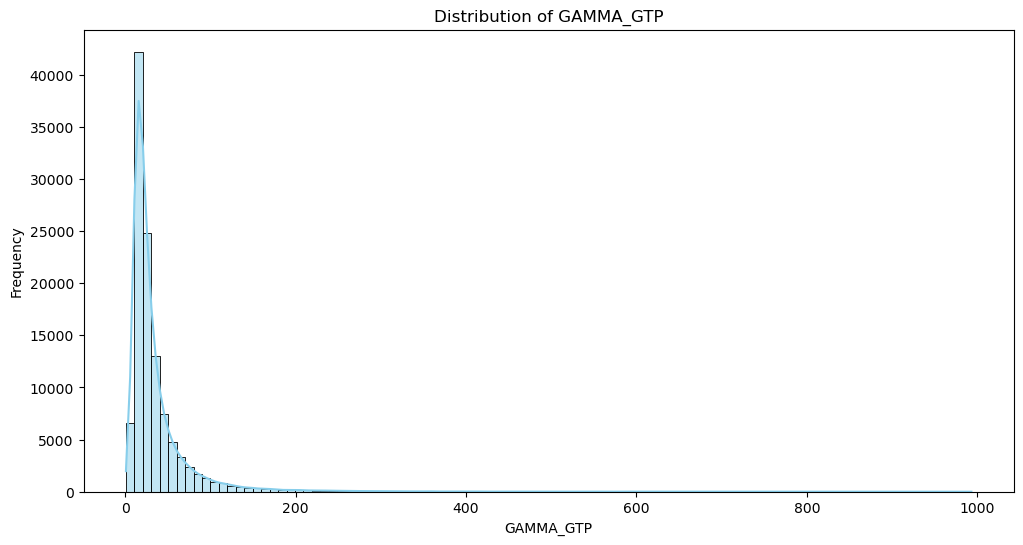

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of GAMMA_GTP
plt.figure(figsize=(12, 6))
sns.histplot(health['GAMMA_GTP'], bins=100, kde=True, color='skyblue')
plt.title('Distribution of GAMMA_GTP')
plt.xlabel('GAMMA_GTP')
plt.ylabel('Frequency')
plt.show()


GAMMA_GTP는 남,여 에 따라 정상 수치 범위가 다르기에 남,여 데이터를 분리하여 비정상 범위에 속한 데이터만 뽑기

In [82]:
# Defining the normal range for GAMMA_GTP based on gender
normal_range = {
    1: (11, 64),  # Male
    2: (8, 35)   # Female
}

# Filtering the data for values of GAMMA_GTP that are out of the normal range
male_out_of_range = health[(health['SEX'] == 1) & 
                           ((health['GAMMA_GTP'] < normal_range[1][0]) | 
                            (health['GAMMA_GTP'] > normal_range[1][1]))]

female_out_of_range = health[(health['SEX'] == 2) & 
                             ((health['GAMMA_GTP'] < normal_range[2][0]) | 
                              (health['GAMMA_GTP'] > normal_range[2][1]))]

male_out_of_range_count = len(male_out_of_range)
female_out_of_range_count = len(female_out_of_range)

male_out_of_range_count, female_out_of_range_count


(12127, 6590)

GAMMA_GTP가 비정상인 데이터들의 다른 피처와의 상관관계 파악


In [87]:
# Filtering data where GAMMA_GTP is out of the normal range for males and females
male_out_of_range = health[(health['SEX'] == 1) & 
                           ((health['GAMMA_GTP'] < normal_range[1][0]) | 
                            (health['GAMMA_GTP'] > normal_range[1][1]))]

female_out_of_range = health[(health['SEX'] == 2) & 
                             ((health['GAMMA_GTP'] < normal_range[2][0]) | 
                              (health['GAMMA_GTP'] > normal_range[2][1]))]

# Calculating correlation for males
male_corr = male_out_of_range.corr()['GAMMA_GTP'].sort_values(ascending=False)

# Calculating correlation for females
female_corr = female_out_of_range.corr()['GAMMA_GTP'].sort_values(ascending=False)

male_corr, female_corr


(GAMMA_GTP                          1.000000
 SGOT_AST                           0.377778
 SGPT_ALT                           0.237109
 TRIGLYCERIDE                       0.164575
 BLDS                               0.128169
 BP_HIGH                            0.096834
 BP_LWST                            0.086751
 SMK_STAT_3.0                       0.070459
 HDL_CHOLE                          0.068860
 TOT_CHOLE                          0.055588
 OLIG_PROTE_CD                      0.055560
 DRK_YN_1.0                         0.052229
 AGE_GROUP_NEW_Middle Age Late      0.042983
 AGE_GROUP_NEW_Elderly Early        0.042142
 HCHK_CE_IN_0.0                     0.041475
 YEAR                               0.016278
 WAIST                              0.014176
 AREA_GROUP_Jeolla                  0.009701
 AREA_GROUP_Gyeongsang              0.008146
 HEAR_RIGHT                         0.006493
 AGE_GROUP_NEW_Elderly Late         0.002032
 AREA_GROUP_Chungcheong & Sejong    0.000849
 AREA_GROU

RandomForestRegresoor를 사용하여 각 피처의 중요도를 확인

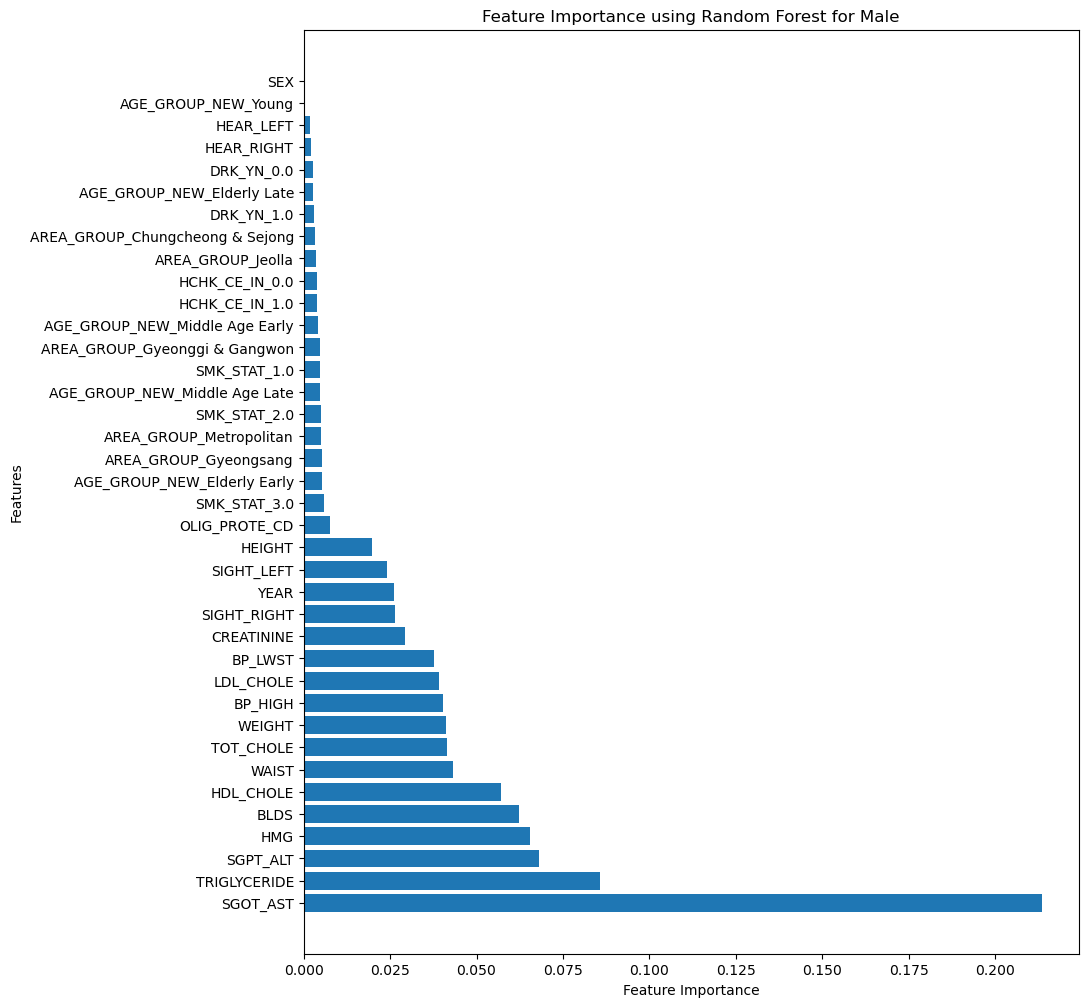

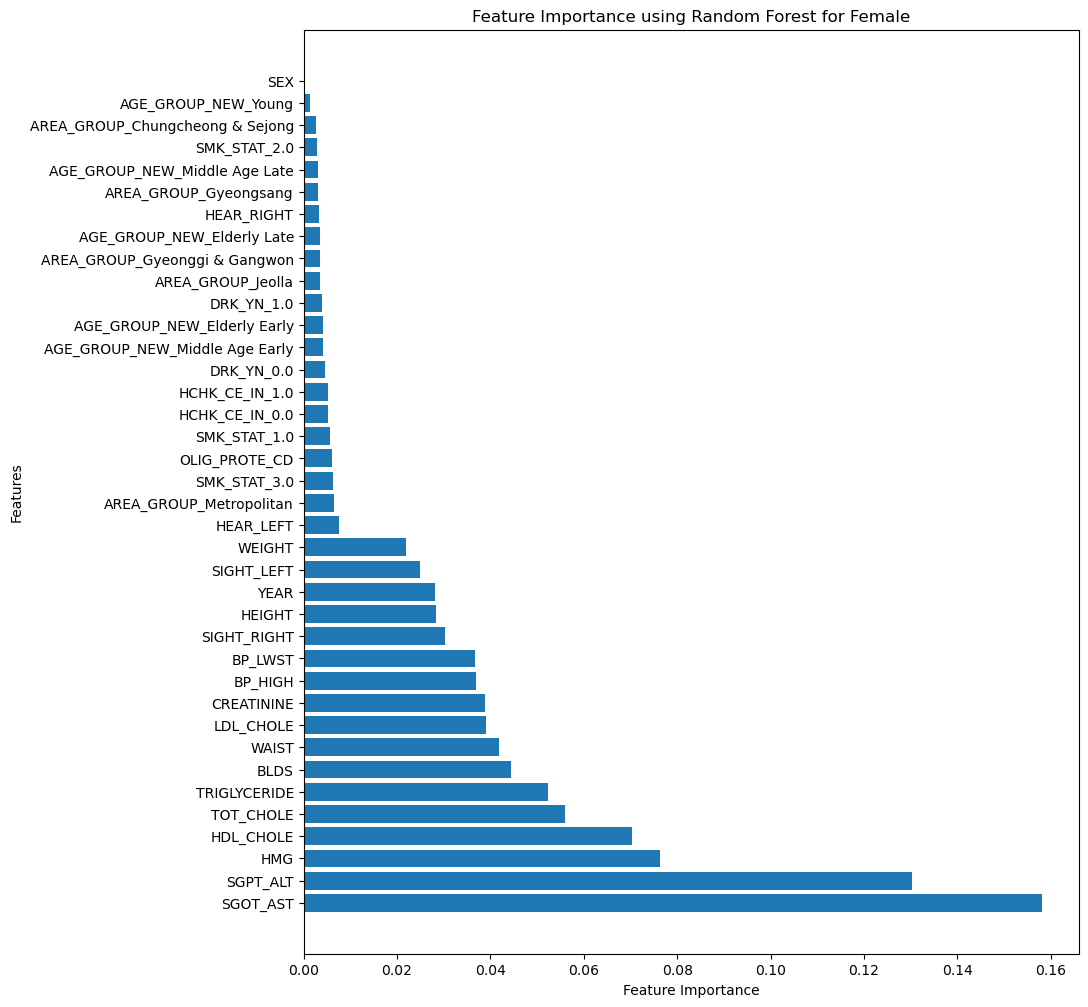

In [84]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

def plot_feature_importance(data, title):
    X = data.drop('GAMMA_GTP', axis=1)
    y = data['GAMMA_GTP']

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)

    importances = model.feature_importances_
    sorted_idx = importances.argsort()[::-1]

    plt.figure(figsize=(10, 12))
    plt.barh(X.columns[sorted_idx], importances[sorted_idx])
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.title(title)
    plt.show()

# Male data
plot_feature_importance(male_out_of_range, "Feature Importance using Random Forest for Male")

# Female data
plot_feature_importance(female_out_of_range, "Feature Importance using Random Forest for Female")


In [86]:
import pandas as pd

def get_feature_importance(data):
    X = data.drop('GAMMA_GTP', axis=1)
    y = data['GAMMA_GTP']

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)

    importances = model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    })

    return feature_importance_df.sort_values(by="Importance", ascending=False)

# For Male data
male_importance = get_feature_importance(male_out_of_range)

# For Female data
female_importance = get_feature_importance(female_out_of_range)

print("Feature Importance for Male:")
print(male_importance)
print("\nFeature Importance for Female:")
print(female_importance)


Feature Importance for Male:
                            Feature  Importance
19                         SGOT_AST    0.213450
13                     TRIGLYCERIDE    0.085740
20                         SGPT_ALT    0.068015
16                              HMG    0.065399
11                             BLDS    0.062384
14                        HDL_CHOLE    0.057057
4                             WAIST    0.043249
12                        TOT_CHOLE    0.041381
3                            WEIGHT    0.041118
9                           BP_HIGH    0.040175
15                        LDL_CHOLE    0.039239
10                          BP_LWST    0.037723
18                       CREATININE    0.029215
6                       SIGHT_RIGHT    0.026480
0                              YEAR    0.026173
5                        SIGHT_LEFT    0.024229
2                            HEIGHT    0.019652
17                    OLIG_PROTE_CD    0.007602
23                     SMK_STAT_3.0    0.005765
33      AGE

---

GAMMA_GTP가 비정상인 남,여 데이터 따로 분리하여서 구한 피처간의 Correlation 값과, RandomForestRegressor을 통해 구한 importance값을 토대로 둘의 합을 통해 변수들의 중요도의 순서를 매김

In [88]:
import pandas as pd

# Feature importance and correlation data for Female
feature_importance_data = {
    "Feature": ["SGOT_AST", "SGPT_ALT", "HMG", "HDL_CHOLE", "TOT_CHOLE", "TRIGLYCERIDE", "BLDS", "WAIST", "LDL_CHOLE", 
                "CREATININE", "BP_HIGH", "BP_LWST", "SIGHT_RIGHT", "HEIGHT", "YEAR", "SIGHT_LEFT", "WEIGHT", "HEAR_LEFT",
                "AREA_GROUP_Metropolitan", "SMK_STAT_3.0", "OLIG_PROTE_CD", "SMK_STAT_1.0", "HCHK_CE_IN_0.0", "HCHK_CE_IN_1.0", 
                "DRK_YN_0.0", "AGE_GROUP_NEW_Middle Age Early", "AGE_GROUP_NEW_Elderly Early", "DRK_YN_1.0", "AREA_GROUP_Jeolla",
                "AREA_GROUP_Gyeonggi & Gangwon", "AGE_GROUP_NEW_Elderly Late", "HEAR_RIGHT", "AREA_GROUP_Gyeongsang", 
                "AGE_GROUP_NEW_Middle Age Late", "SMK_STAT_2.0", "AREA_GROUP_Chungcheong & Sejong", "AGE_GROUP_NEW_Young", "SEX"],
    "Importance": [0.158059, 0.130193, 0.076212, 0.070241, 0.056046, 0.052425, 0.044361, 0.041846, 0.039054, 
                   0.038855, 0.036894, 0.036605, 0.030173, 0.028256, 0.028023, 0.024853, 0.021892, 0.007527, 
                   0.006413, 0.006225, 0.006082, 0.005723, 0.005217, 0.005151, 0.004596, 0.004200, 0.004064, 
                   0.003998, 0.003506, 0.003489, 0.003439, 0.003190, 0.003172, 0.003097, 0.002899, 0.002724, 0.001303, 0.000000],
    "Correlation": [0.384970, 0.353159, 0.072927, 0.008023, 0.076805, 0.114221, 0.110215, 0.101712, 0.025133, 
                    -0.016617, 0.080429, 0.074153, -0.013423, -0.040226, 0.057245, -0.024050, 0.036383, 0.017602, 
                    0.005041, 0.072226, 0.034838, -0.076235, 0.010543, -0.010543, -0.020837, -0.052599, 0.071774, 
                    0.020837, 0.005353, -0.013510, 0.029445, 0.019146, 0.010347, -0.016165, 0.030442, -0.006814, -0.102136, None]
}

# Convert to DataFrame
df_female = pd.DataFrame(feature_importance_data)

# Calculate a combined score
df_female["Combined_Score"] = df_female["Importance"] + abs(df_female["Correlation"])

# Rank the features based on the combined score
df_female_ranked = df_female.sort_values(by="Combined_Score", ascending=False)

df_female_ranked.


,Feature,Importance,Correlation,Combined_Score
0,SGOT_AST,0.158059,0.384970,0.543029
1,SGPT_ALT,0.130193,0.353159,0.483352
5,TRIGLYCERIDE,0.052425,0.114221,0.166646
6,BLDS,0.044361,0.110215,0.154576
2,HMG,0.076212,0.072927,0.149139
7,WAIST,0.041846,0.101712,0.143558
4,TOT_CHOLE,0.056046,0.076805,0.132851
10,BP_HIGH,0.036894,0.080429,0.117323
11,BP_LWST,0.036605,0.074153,0.110758
36,AGE_GROUP_NEW_Young,0.001303,-0.102136,0.103439


GAMMA_GTP 비정상인 여자 그룸에서 GAMMA_GTP가 비정상인 것에 영향을 가장 많이 주는 20개의 피처 선택

In [93]:
top_20_female_features = df_female_ranked['Feature'][:20].tolist()
print(top_20_female_features)



['SGOT_AST', 'SGPT_ALT', 'TRIGLYCERIDE', 'BLDS', 'HMG', 'WAIST', 'TOT_CHOLE', 'BP_HIGH', 'BP_LWST', 'AGE_GROUP_NEW_Young', 'YEAR', 'SMK_STAT_1.0', 'SMK_STAT_3.0', 'HDL_CHOLE', 'AGE_GROUP_NEW_Elderly Early', 'HEIGHT', 'LDL_CHOLE', 'WEIGHT', 'AGE_GROUP_NEW_Middle Age Early', 'CREATININE']


여자 중 GAMMAA_GTP가 비정상인 그룹, 정상인 그룸으로 나눈 후 선택한 20개의 피쳐에 대하여 피처별 평균값의 차이를 계산하여 그래프를 통해 확인

In [106]:
health_f = health[health['SEX'] == 2]
selected_features = ['SGOT_AST', 'SGPT_ALT', 'TRIGLYCERIDE', 'BLDS', 'HMG', 'WAIST', 'TOT_CHOLE', 'BP_HIGH', 'BP_LWST', 'AGE_GROUP_NEW_Young', 'YEAR', 'SMK_STAT_1.0', 'SMK_STAT_3.0', 'HDL_CHOLE', 'AGE_GROUP_NEW_Elderly Early', 'HEIGHT', 'LDL_CHOLE', 'WEIGHT', 'AGE_GROUP_NEW_Middle Age Early', 'CREATININE','GAMMA_GTP']
health_f_selected = health_f[selected_features]

# 정상 그룹과 비정상 그룹으로 나눔
normal_female = health_f_selected[(health_f_selected['GAMMA_GTP'] >= 8) & (health_f_selected['GAMMA_GTP'] <= 35)]
abnormal_female = health_f_selected[(health_f_selected['GAMMA_GTP'] < 8) | (health_f_selected['GAMMA_GTP'] > 35)]


예를 들어 50% 가 나온 것들은 비정상인 그룹이 정상 그룹에 대하여  평균값이 50% 높다는 것이고 음수면 그만 큼 낮다는 것을 의미


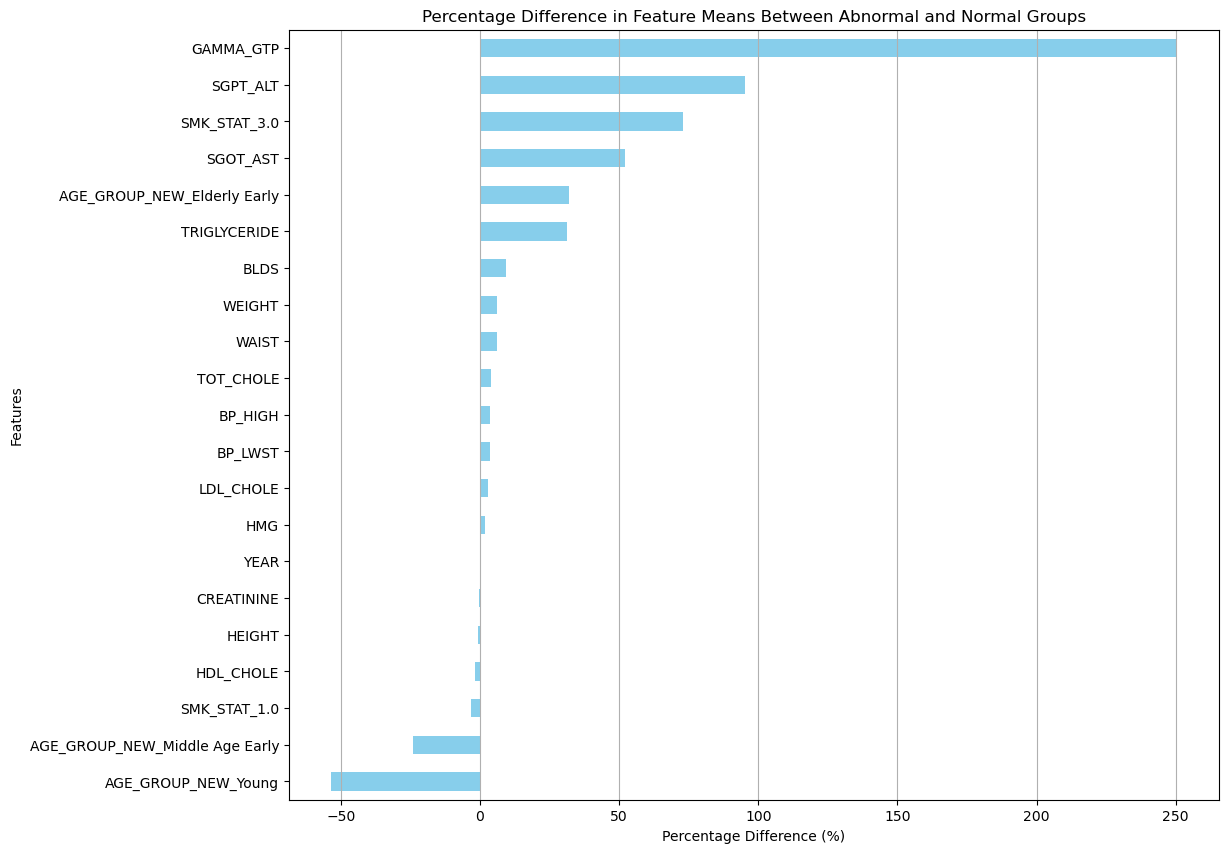

In [107]:
import matplotlib.pyplot as plt
import numpy as np

# 각 피처별로 정상 그룹과 비정상 그룹의 평균 값을 계산
normal_means = normal_female.mean()
abnormal_means = abnormal_female.mean()

# 피처별 평균 값의 차이를 계산
diff = (abnormal_means - normal_means) / normal_means * 100

# 차이를 기준으로 정렬
sorted_indices = np.argsort(diff)

# 그래프 그리기
plt.figure(figsize=(12, 10))
diff.iloc[sorted_indices].plot(kind='barh', color='skyblue')
plt.xlabel('Percentage Difference (%)')
plt.ylabel('Features')
plt.title('Percentage Difference in Feature Means Between Abnormal and Normal Groups')
plt.grid(True, axis='x')
plt.show()



GAMMA_GTP 비정상인 남자 그룸에서 GAMMA_GTP가 비정상인 것에 영향을 가장 많이 주는 20개의 피처 선택

In [90]:
# Feature Importance & Correlation for Male
import pandas as pd

# Feature Importance
male_feature_importance = {
    'Feature': ['SGOT_AST', 'TRIGLYCERIDE', 'SGPT_ALT', 'HMG', 'BLDS', 'HDL_CHOLE', 'WAIST', 'TOT_CHOLE', 'WEIGHT', 'BP_HIGH', 'LDL_CHOLE', 'BP_LWST', 'CREATININE', 'SIGHT_RIGHT', 'YEAR', 'SIGHT_LEFT', 'HEIGHT', 'OLIG_PROTE_CD', 'SMK_STAT_3.0', 'AGE_GROUP_NEW_Elderly Early', 'AREA_GROUP_Gyeongsang', 'AREA_GROUP_Metropolitan', 'SMK_STAT_2.0', 'AGE_GROUP_NEW_Middle Age Late', 'SMK_STAT_1.0', 'AREA_GROUP_Gyeonggi & Gangwon', 'AGE_GROUP_NEW_Middle Age Early', 'HCHK_CE_IN_1.0', 'HCHK_CE_IN_0.0', 'AREA_GROUP_Jeolla', 'AREA_GROUP_Chungcheong & Sejong', 'DRK_YN_1.0', 'AGE_GROUP_NEW_Elderly Late', 'DRK_YN_0.0', 'HEAR_RIGHT', 'HEAR_LEFT', 'AGE_GROUP_NEW_Young', 'SEX'],
    'Importance': [0.213450, 0.085740, 0.068015, 0.065399, 0.062384, 0.057057, 0.043249, 0.041381, 0.041118, 0.040175, 0.039239, 0.037723, 0.029215, 0.026480, 0.026173, 0.024229, 0.019652, 0.007602, 0.005765, 0.005376, 0.005344, 0.004996, 0.004947, 0.004843, 0.004751, 0.004699, 0.004064, 0.003827, 0.003716, 0.003622, 0.003195, 0.002850, 0.002776, 0.002649, 0.001982, 0.001830, 0.000487, 0.000000]
}

male_feature_corr = {
    'Feature': ['GAMMA_GTP', 'SGOT_AST', 'SGPT_ALT', 'TRIGLYCERIDE', 'BLDS', 'BP_HIGH', 'BP_LWST', 'SMK_STAT_3.0', 'HDL_CHOLE', 'TOT_CHOLE', 'OLIG_PROTE_CD', 'DRK_YN_1.0', 'AGE_GROUP_NEW_Middle Age Late', 'AGE_GROUP_NEW_Elderly Early', 'HCHK_CE_IN_0.0', 'YEAR', 'WAIST', 'AREA_GROUP_Jeolla', 'AREA_GROUP_Gyeongsang', 'HEAR_RIGHT', 'AGE_GROUP_NEW_Elderly Late', 'AREA_GROUP_Chungcheong & Sejong', 'AREA_GROUP_Gyeonggi & Gangwon', 'SIGHT_RIGHT', 'HEAR_LEFT', 'SMK_STAT_2.0', 'AREA_GROUP_Metropolitan', 'SIGHT_LEFT', 'CREATININE', 'HMG', 'HCHK_CE_IN_1.0', 'DRK_YN_0.0', 'WEIGHT', 'AGE_GROUP_NEW_Young', 'LDL_CHOLE', 'HEIGHT', 'AGE_GROUP_NEW_Middle Age Early', 'SMK_STAT_1.0', 'SEX'],
    'Correlation': [1.000000, 0.377778, 0.237109, 0.164575, 0.128169, 0.096834, 0.086751, 0.070459, 0.068860, 0.055588, 0.055560, 0.052229, 0.042983, 0.042142, 0.041475, 0.016278, 0.014176, 0.009701, 0.008146, 0.006493, 0.002032, 0.000849, 0.000792, 0.000137, -0.005864, -0.006158, -0.010644, -0.017101, -0.024637, -0.034233, -0.041475, -0.052229, -0.053008, -0.053542, -0.053726, -0.062984, -0.065575, -0.077107, 0]
}

# Convert to DataFrame
male_importance_df = pd.DataFrame(male_feature_importance)
male_corr_df = pd.DataFrame(male_feature_corr)

# Merge the two dataframes
male_combined = pd.merge(male_importance_df, male_corr_df, on="Feature")
male_combined['Combined_Score'] = male_combined['Importance'] + abs(male_combined['Correlation'])

# Sort by Combined Score
male_combined_sorted = male_combined.sort_values(by='Combined_Score', ascending=False)

male_combined_sorted


,Feature,Importance,Correlation,Combined_Score
0,SGOT_AST,0.213450,0.377778,0.591228
2,SGPT_ALT,0.068015,0.237109,0.305124
1,TRIGLYCERIDE,0.085740,0.164575,0.250315
4,BLDS,0.062384,0.128169,0.190553
9,BP_HIGH,0.040175,0.096834,0.137009
5,HDL_CHOLE,0.057057,0.068860,0.125917
11,BP_LWST,0.037723,0.086751,0.124474
3,HMG,0.065399,-0.034233,0.099632
7,TOT_CHOLE,0.041381,0.055588,0.096969
8,WEIGHT,0.041118,-0.053008,0.094126


In [94]:
top_20_male_features = male_combined_sorted['Feature'][:20].tolist()
print(top_20_male_features)

['SGOT_AST', 'SGPT_ALT', 'TRIGLYCERIDE', 'BLDS', 'BP_HIGH', 'HDL_CHOLE', 'BP_LWST', 'HMG', 'TOT_CHOLE', 'WEIGHT', 'LDL_CHOLE', 'HEIGHT', 'SMK_STAT_1.0', 'SMK_STAT_3.0', 'AGE_GROUP_NEW_Middle Age Early', 'OLIG_PROTE_CD', 'WAIST', 'DRK_YN_1.0', 'DRK_YN_0.0', 'AGE_GROUP_NEW_Young']


남 중 GAMMAA_GTP가 비정상인 그룹, 정상인 그룸으로 나눈 후 선택한 20개의 피쳐에 대하여 피처별 평균값의 차이를 계산하여 그래프를 통해 확인

In [108]:
health_m = health[health['SEX'] == 2]
selected_features = ['SGOT_AST', 'SGPT_ALT', 'TRIGLYCERIDE', 'BLDS', 'BP_HIGH', 'HDL_CHOLE', 'BP_LWST', 'HMG', 'TOT_CHOLE', 'WEIGHT', 'LDL_CHOLE', 'HEIGHT', 'SMK_STAT_1.0', 'SMK_STAT_3.0', 'AGE_GROUP_NEW_Middle Age Early', 'OLIG_PROTE_CD', 'WAIST', 'DRK_YN_1.0', 'DRK_YN_0.0', 'AGE_GROUP_NEW_Young','GAMMA_GTP']
health_m_selected = health_m[selected_features]

# 정상 그룹과 비정상 그룹으로 나눔
normal_male = health_m_selected[(health_m_selected['GAMMA_GTP'] >= 11) & (health_m_selected['GAMMA_GTP'] <= 64)]
abnormal_male = health_m_selected[(health_m_selected['GAMMA_GTP'] < 11) | (health_m_selected['GAMMA_GTP'] > 64)]


예를 들어 50% 가 나온 것들은 비정상인 그룹이 정상 그룹에 대하여 평균값이 50% 높다는 것이고 음수면 그만 큼 낮다는 것을 의미


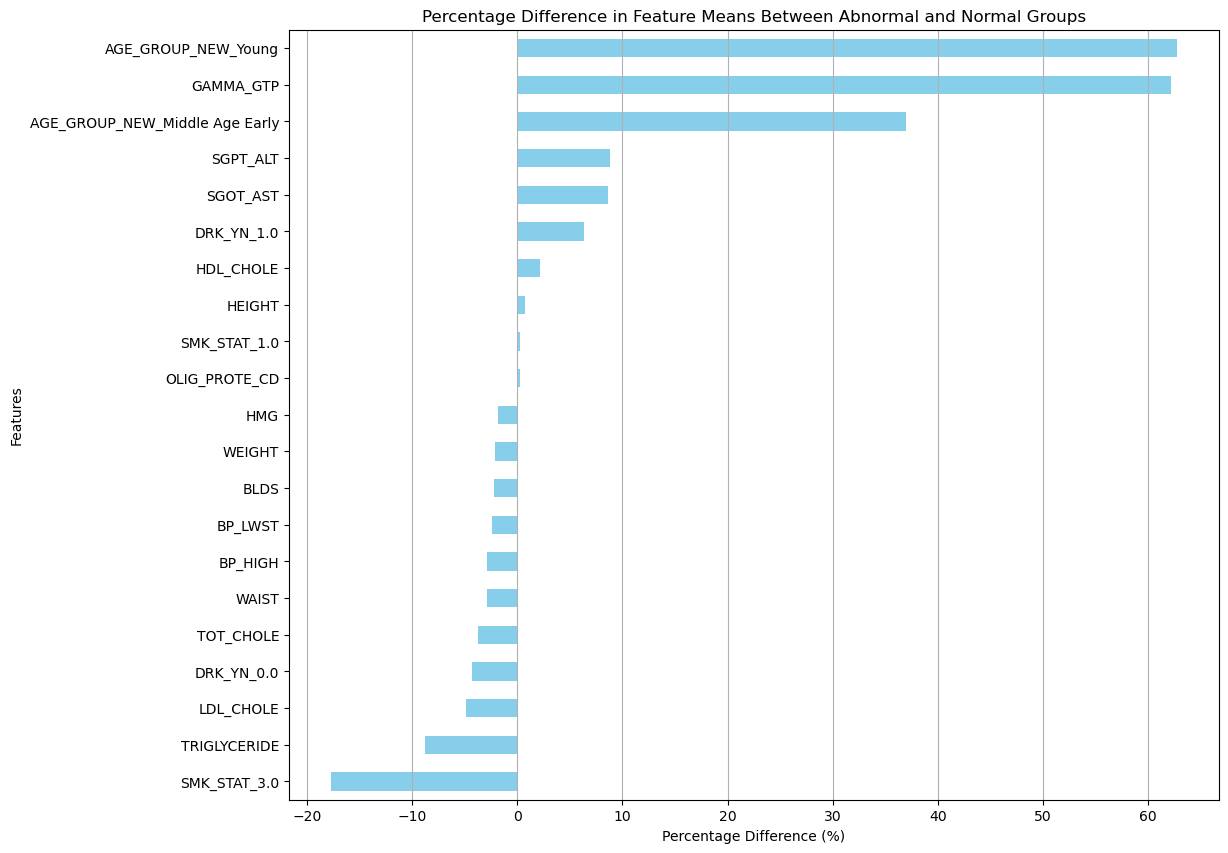

In [109]:
# 각 피처별로 정상 그룹과 비정상 그룹의 평균 값을 계산
normal_means = normal_male.mean()
abnormal_means = abnormal_male.mean()

# 피처별 평균 값의 차이를 계산
diff = (abnormal_means - normal_means) / normal_means * 100

# 차이를 기준으로 정렬
sorted_indices = np.argsort(diff)

# 그래프 그리기
plt.figure(figsize=(12, 10))
diff.iloc[sorted_indices].plot(kind='barh', color='skyblue')
plt.xlabel('Percentage Difference (%)')
plt.ylabel('Features')
plt.title('Percentage Difference in Feature Means Between Abnormal and Normal Groups')
plt.grid(True, axis='x')
plt.show()

In [ ]:
GAMMA_GTP 비교분석

1. 연령대 별로 gamma-GTP 이상치의 비율 시각화

In [ ]:
import matplotlib.pyplot as plt

# Define the gamma-GTP thresholds for abnormal values
threshold_female = 35
threshold_male = 64

# Define a function to calculate the abnormal ratio per age group
def calculate_abnormal_ratio(data, threshold):
    age_groups = ["Young", "Middle", "Old"]
    abnormal_ratios = []
    for group in age_groups:
        total_count = data[f"AGE_GROUP_{group}"].sum()
        abnormal_count = data[(data[f"AGE_GROUP_{group}"] == 1) & (data["GAMMA_GTP"] > threshold)].shape[0]
        ratio = (abnormal_count / total_count) * 100 if total_count != 0 else 0
        abnormal_ratios.append(ratio)
    return age_groups, abnormal_ratios

# Calculate abnormal ratio for female and male data
age_groups_female, abnormal_ratios_female = calculate_abnormal_ratio(female_data, threshold_female)
age_groups_male, abnormal_ratios_male = calculate_abnormal_ratio(male_data, threshold_male)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(age_groups_female, abnormal_ratios_female, alpha=0.7, label='Female')
plt.bar(age_groups_male, abnormal_ratios_male, alpha=0.7, label='Male', width=0.5)
plt.xlabel("Age Group")
plt.ylabel("Abnormal Gamma-GTP Ratio (%)")
plt.title("Abnormal Gamma-GTP Ratios per Age Group")
plt.legend()
plt.grid(axis='y')
plt.show()

In [ ]:
# Plotting with updated colors
plt.figure(figsize=(10, 6))
plt.bar(age_groups_female, abnormal_ratios_female, color='pink', alpha=0.7, label='Female')
plt.bar(age_groups_male, abnormal_ratios_male, color='blue', alpha=0.7, label='Male', width=0.5)
plt.xlabel("Age Group")
plt.ylabel("Abnormal Gamma-GTP Ratio (%)")
plt.title("Abnormal Gamma-GTP Ratios per Age Group")
plt.legend()
plt.grid(axis='y')
plt.show()

2. 지역별 gamma-GTP 이상치 비율 시각화

In [ ]:
# Define a function to calculate the abnormal ratio per area group
def calculate_area_abnormal_ratio(data, threshold):
    area_groups = [col for col in data.columns if "AREA_GROUP_" in col]
    area_names = [col.split("_", 2)[2] for col in area_groups]
    abnormal_ratios = []
    for group in area_groups:
        total_count = data[group].sum()
        abnormal_count = data[(data[group] == 1) & (data["GAMMA_GTP"] > threshold)].shape[0]
        ratio = (abnormal_count / total_count) * 100 if total_count != 0 else 0
        abnormal_ratios.append(ratio)
    return area_names, abnormal_ratios

# Calculate abnormal ratio for female and male data per area group
area_names_female, abnormal_ratios_area_female = calculate_area_abnormal_ratio(female_data, threshold_female)
area_names_male, abnormal_ratios_area_male = calculate_area_abnormal_ratio(male_data, threshold_male)

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

axs[0].bar(area_names_female, abnormal_ratios_area_female, color='pink', alpha=0.7)
axs[0].set_ylabel("Abnormal Gamma-GTP Ratio (%)")
axs[0].set_title("Abnormal Gamma-GTP Ratios per Area Group (Female)")
axs[0].grid(axis='y')

axs[1].bar(area_names_male, abnormal_ratios_area_male, color='blue', alpha=0.7)
axs[1].set_xlabel("Area Group")
axs[1].set_ylabel("Abnormal Gamma-GTP Ratio (%)")
axs[1].set_title("Abnormal Gamma-GTP Ratios per Area Group (Male)")
axs[1].grid(axis='y')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Plotting in a single chart with deeper pink for female
plt.figure(figsize=(12, 6))
plt.bar(area_names_female, abnormal_ratios_area_female, color='hotpink', alpha=0.7, label='Female')
plt.bar(area_names_male, abnormal_ratios_area_male, color='blue', alpha=0.7, label='Male', width=0.5)
plt.xlabel("Area Group")
plt.ylabel("Abnormal Gamma-GTP Ratio (%)")
plt.title("Abnormal Gamma-GTP Ratios per Area Group")
plt.legend()
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

3. 흡연 & 음주와 gamma-GTP 연관성

In [ ]:
# Plotting with normal range

fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Smoking status
axs[0, 0].bar(smoking_status_female, means_smoking_female, color='hotpink', alpha=0.7)
axs[0, 0].axhline(y=35, color='r', linestyle='--', label='Upper normal limit (Female)')
axs[0, 0].set_ylabel("Mean Gamma-GTP")
axs[0, 0].set_title("Mean Gamma-GTP per Smoking Status (Female)")
axs[0, 0].legend()
axs[0, 0].grid(axis='y')

axs[0, 1].bar(smoking_status_male, means_smoking_male, color='blue', alpha=0.7)
axs[0, 1].axhline(y=64, color='r', linestyle='--', label='Upper normal limit (Male)')
axs[0, 1].set_ylabel("Mean Gamma-GTP")
axs[0, 1].set_title("Mean Gamma-GTP per Smoking Status (Male)")
axs[0, 1].legend()
axs[0, 1].grid(axis='y')

# Drinking status
axs[1, 0].bar(drinking_status_female, means_drinking_female, color='hotpink', alpha=0.7)
axs[1, 0].axhline(y=35, color='r', linestyle='--', label='Upper normal limit (Female)')
axs[1, 0].set_xlabel("Drinking Status")
axs[1, 0].set_ylabel("Mean Gamma-GTP")
axs[1, 0].set_title("Mean Gamma-GTP per Drinking Status (Female)")
axs[1, 0].legend()
axs[1, 0].grid(axis='y')

axs[1, 1].bar(drinking_status_male, means_drinking_male, color='blue', alpha=0.7)
axs[1, 1].axhline(y=64, color='r', linestyle='--', label='Upper normal limit (Male)')
axs[1, 1].set_xlabel("Drinking Status")
axs[1, 1].set_ylabel("Mean Gamma-GTP")
axs[1, 1].set_title("Mean Gamma-GTP per Drinking Status (Male)")
axs[1, 1].legend()
axs[1, 1].grid(axis='y')

plt.tight_layout()
plt.show()

흡연 음주 관련 추가 분석

In [ ]:
# Define a function to calculate abnormal ratio per custom group
def calculate_custom_abnormal_ratio(data, threshold):
    # Define custom groups
    both_do = data[(data["SMK_STAT_3.0"] == 1) & (data["DRK_YN_1.0"] == 1)]
    neither_do = data[(data["SMK_STAT_1.0"] == 1) & (data["DRK_YN_0.0"] == 1)]
    rest = data[~data.index.isin(both_do.index) & ~data.index.isin(neither_do.index)]
    
    # Calculate abnormal ratio
    groups = [both_do, neither_do, rest]
    group_names = ["Both", "Neither", "Rest"]
    abnormal_ratios = []
    for group in groups:
        total_count = group.shape[0]
        abnormal_count = group[group["GAMMA_GTP"] > threshold].shape[0]
        ratio = (abnormal_count / total_count) * 100 if total_count != 0 else 0
        abnormal_ratios.append(ratio)
    return group_names, abnormal_ratios

# Calculate abnormal ratio for female and male data per custom group
group_names_female, abnormal_ratios_custom_female = calculate_custom_abnormal_ratio(female_data, threshold_female)
group_names_male, abnormal_ratios_custom_male = calculate_custom_abnormal_ratio(male_data, threshold_male)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].bar(group_names_female, abnormal_ratios_custom_female, color='hotpink', alpha=0.7)
axs[0].set_ylabel("Abnormal Gamma-GTP Ratio (%)")
axs[0].set_title("Abnormal Gamma-GTP Ratios per Custom Group (Female)")
axs[0].grid(axis='y')

axs[1].bar(group_names_male, abnormal_ratios_custom_male, color='blue', alpha=0.7)
axs[1].set_ylabel("Abnormal Gamma-GTP Ratio (%)")
axs[1].set_title("Abnormal Gamma-GTP Ratios per Custom Group (Male)")
axs[1].grid(axis='y')

plt.tight_layout()
plt.show()

 연령대 별 흡연비율과 음주비율

In [ ]:
# Define a function to plot single behavior across age groups for each gender
def plot_single_behavior(data, behavior_column, age_group_columns, title):
    proportions = []
    for age_group in age_group_columns:
        age_data = data[data[age_group] == 1]
        proportions.append(age_data[behavior_column].mean())
    
    plt.figure(figsize=(8, 5))
    plt.bar(age_group_columns, proportions, color=['blue', 'green', 'red'])
    plt.ylabel('Proportion')
    plt.title(title)
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.show()

# Define behavior columns
smoking_column = "SMK_STAT_3.0"  # Current Smoker
drinking_column = "DRK_YN_1.0"  # Drinker

# Plot graphs for female and male data
plot_single_behavior(female_data, smoking_column, age_group_columns, 'Proportion of Current Smokers Across Age Groups (Female)')
plot_single_behavior(male_data, smoking_column, age_group_columns, 'Proportion of Current Smokers Across Age Groups (Male)')
plot_single_behavior(female_data, drinking_column, age_group_columns, 'Proportion of Drinkers Across Age Groups (Female)')
plot_single_behavior(male_data, drinking_column, age_group_columns, 'Proportion of Drinkers Across Age Groups (Male)')